## Explore Genres over Time

* there might be too much variation in the plot keywords and that could need a more thoughtful and thorough analysis but check out the genres, what can you learn there

In [320]:
import sys

from dotenv import find_dotenv, dotenv_values
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

config = dotenv_values(find_dotenv(".env"))

sys.path.append("..")
from src.make_data import build_metrics, filter_tv_shows, get_long_text_summary
from src.plots import colors_zebra_interview

sys.tracebacklimit = 0 # easier to see problems
plt.rcParams["figure.figsize"] = (20,12)


## Load the Data

In [321]:
df = pd.read_csv(config["cleaned_data_path"])
print(df.shape)

df = build_metrics(df)
df = filter_tv_shows(df)

# set indicators used here
df = df.assign(franchise_ind = np.where(df["movie_franchise"].notnull(), 1, 0),
               break_out_hits_ind = np.where(df["lift"] > 5, "yes", "no")) # 5x what is budgeted could be considered a hit

df = df.reset_index(drop=False)

(4920, 30)
shape - (4920, 35), columns added - ['budget_log', 'gross_log', 'lift', 'profit', 'ROI']


## Exploring Genre 

In [322]:
df.genres.head().to_frame()

,genres
0,Crime|Drama
1,Action|Crime|Drama|Thriller
2,Action|Adventure|Sci-Fi|Thriller
3,Drama
4,Crime|Drama


In [323]:
get_long_text_summary(df, "genres").sort_values("n", ascending=False).head(10)

,n,num_voted,movie_score,movie_score_median
kw_clean,,,,
Drama,2456,78212.03,6.74,6.80
Comedy,1805,64192.95,6.17,6.30
Thriller,1335,93949.20,6.28,6.40
Action,1093,124071.91,6.21,6.30
Romance,1063,64963.67,6.44,6.50
Adventure,878,139323.45,6.42,6.55
Crime,836,93274.20,6.51,6.60
Sci-Fi,577,144469.40,6.24,6.30
Fantasy,569,121240.56,6.27,6.40


In [324]:
# also have the same format for plot k-w
df.plot_keywords.head().to_frame()

,plot_keywords
0,escape from prison|first person narration|pris...
1,based on comic book|dc comics|psychopath|star ...
2,ambiguous ending|corporate espionage|dream|sub...
3,anti establishment|dark humor|fighting|multipl...
4,black comedy|cunnilingus|neo noir|nonlinear ti...


In [325]:
get_long_text_summary(df, "plot_keywords")

,n,num_voted,movie_score,movie_score_median
kw_clean,,,,
prison cell search,1,1689764.0,9.3,9.3
wrongful imprisonment,1,1689764.0,9.3,9.3
rise to power,1,1155770.0,9.2,9.2
lake tahoe nevada,1,790926.0,9.0,9.0
postmodern,1,1324680.0,8.9,8.9
...,...,...,...,...
cnn reporter,1,534.0,1.9,1.9
science experiment,1,25371.0,1.9,1.9
pun,1,4377.0,1.7,1.7


## Top Genres

* using the Genre keywords what are the top groups by profitability and audience rating

In [329]:
#Overall
df_explode = df.iloc[df["genres"].str.split("|").explode().index,:]
df_explode = df_explode.assign(genre_clean = df["genres"].str.split("|").explode())

tbl = df_explode.groupby(["genre_clean"]).agg(
    n = ("movie_title", "count"),
    median_score = ("movie_score", "median"),
    median_gross = ("gross", "median"),
    median_budget = ("budget", "median"),
    sum_gross = ("gross", "sum"),
    sum_budget = ("budget", "sum")
).query("(n > 30)").astype(int)

tbl = tbl.assign(lift = (tbl["sum_budget"] / tbl["sum_gross"]).round(2)).sort_values("lift", ascending = True)

tbl = tbl.reset_index()
tbl

,genre_clean,n,median_score,median_gross,median_budget,sum_gross,sum_budget,lift
0,Documentary,119,7,2283276,1000000,1103051501,455554529,0.41
1,Music,209,6,19281235,15000000,6349225812,3672552348,0.58
2,Sport,176,6,28831145,24000000,6588655818,4763710370,0.72
3,Musical,129,6,25571351,20000000,5821812990,4316237014,0.74
4,Family,519,6,63038802,40000000,40285254155,30932926127,0.77
5,Mystery,460,6,28876924,22000000,17656533545,13923652324,0.79
6,Romance,1063,6,21067338,18000000,37686990169,29973425548,0.80
7,Biography,289,7,15785632,20000000,8874120363,7116105786,0.80
8,Fantasy,569,6,47952020,42000000,42417717475,34947744723,0.82
9,Comedy,1805,6,26128995,20000000,76089997893,63551312609,0.84


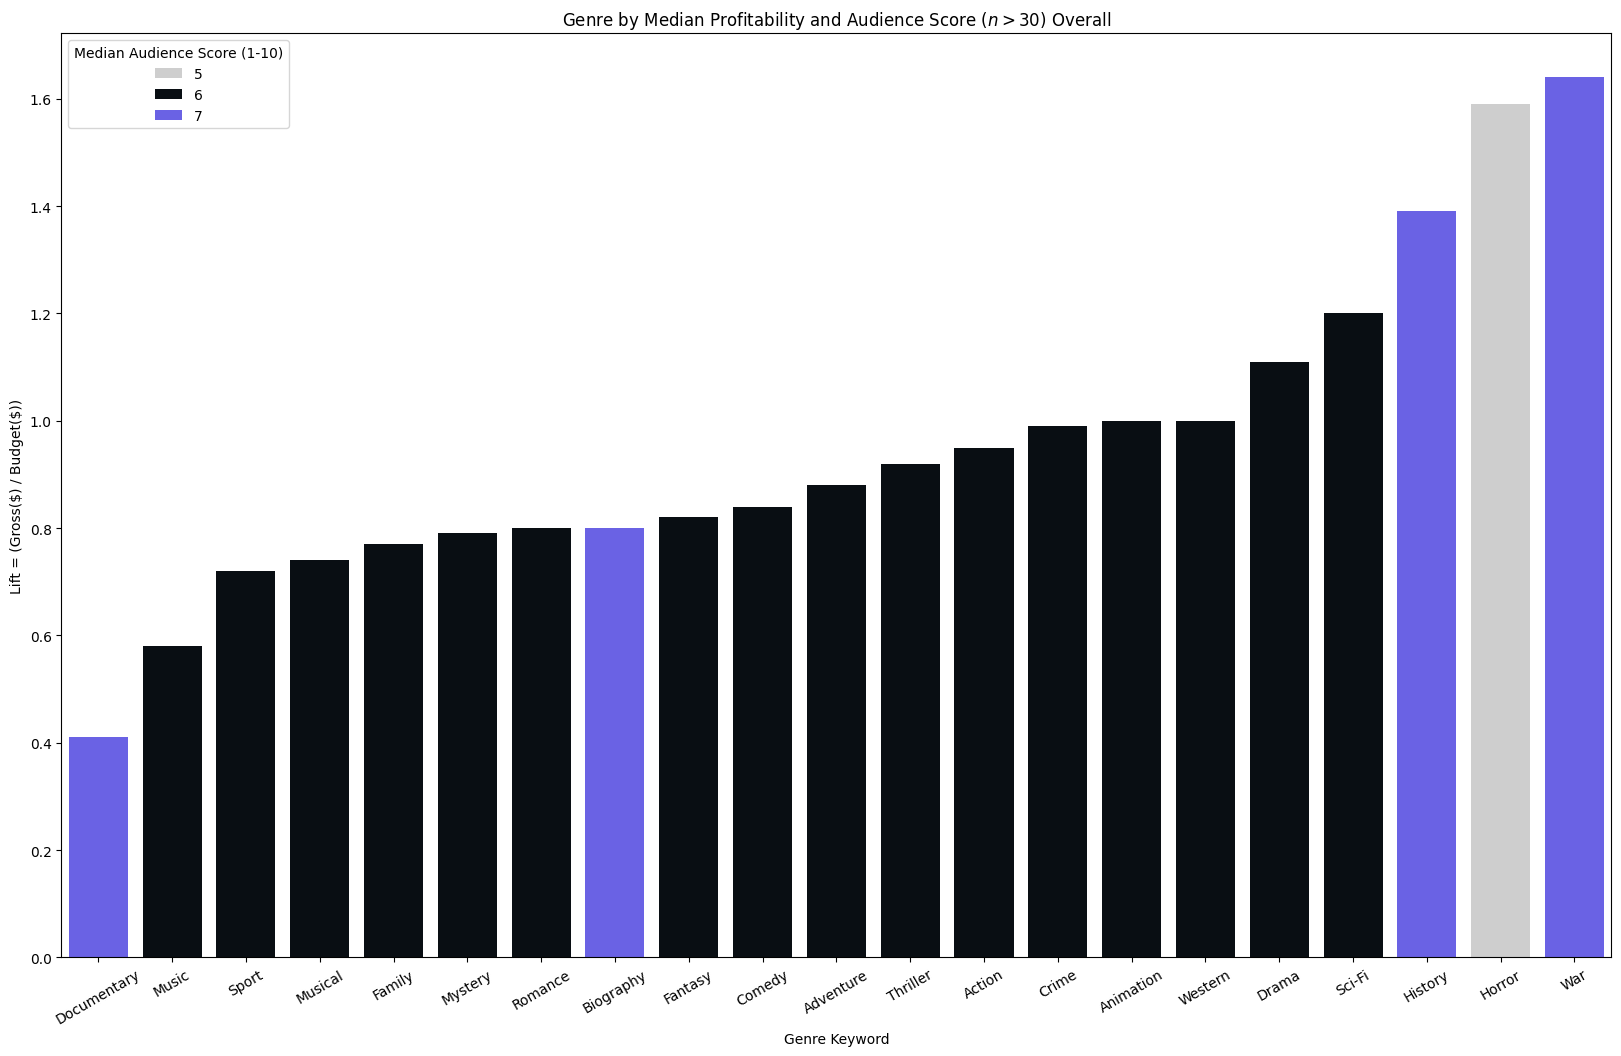

In [330]:
pal = {7: '#574cfa',
 6: '#070e15',
 5: '#cecece'}


fig, ax = plt.subplots()

sns.barplot(data = tbl, x = "genre_clean", y = "lift", hue = "median_score", palette=pal).set(title = "Genre by Median Profitability and Audience Score ($n > 30$) Overall",
                                                                                 xlabel= "Genre Keyword", ylabel = "Lift = (Gross(\$) / Budget(\$))")
plt.xticks(rotation=30)
ax.legend(title = "Median Audience Score (1-10)")

### Top Genres - USA

In [343]:
df_explode = df.iloc[df["genres"].str.split("|").explode().index,:]
df_explode = df_explode.assign(genre_clean = df["genres"].str.split("|").explode())

tbl = df_explode.groupby(["genre_clean", "country"]).agg(
    n = ("movie_title", "count"),
    median_score = ("movie_score", "median"),
    median_gross = ("gross", "median"),
    median_budget = ("budget", "median"),
    sum_gross = ("gross", "sum"),
    sum_budget = ("budget", "sum")
).query("(n > 30) and (country == 'USA')").astype(int)

tbl = tbl.assign(lift = (tbl["sum_budget"] / tbl["sum_gross"]).round(2)).sort_values("lift", ascending = True)

tbl = tbl.reset_index()
tbl

,genre_clean,country,n,median_score,median_gross,median_budget,sum_gross,sum_budget,lift
0,Documentary,USA,89,7,2601847,750000,948057210,213879529,0.23
1,Music,USA,169,6,25000000,15000000,5910597440,3194917848,0.54
2,Musical,USA,107,6,38628363,20000000,5538122208,3190777014,0.58
3,Horror,USA,410,5,30259652,10000000,11536189498,7112265229,0.62
4,Biography,USA,177,7,30226144,23000000,7419950246,4689610786,0.63
5,Romance,USA,806,6,27758465,20000000,33757536838,21662964289,0.64
6,Comedy,USA,1476,6,31584722,20000000,70533764452,44873367875,0.64
7,Family,USA,415,6,69395647,45000000,35471872166,24230641229,0.68
8,Drama,USA,1757,6,23114675,18000000,62022503222,43630191838,0.70
9,Sport,USA,146,6,32658978,25000000,6118767967,4306510211,0.70


In [332]:
colors_zebra_interview

{'Vibrant Purple': '#574cfa',
 'Dark Charcoal': '#070e15',
 'Medium Gray': '#c8c8c8',
 'Deep Blue': '#1b1d4e',
 'Royal Blue': '#2f2d87',
 'Light Gray': '#c7c7c7',
 'Light Silver': '#cfcfcf',
 'Soft Gray': '#d0d0d0',
 'Warm Gray': '#cecece'}

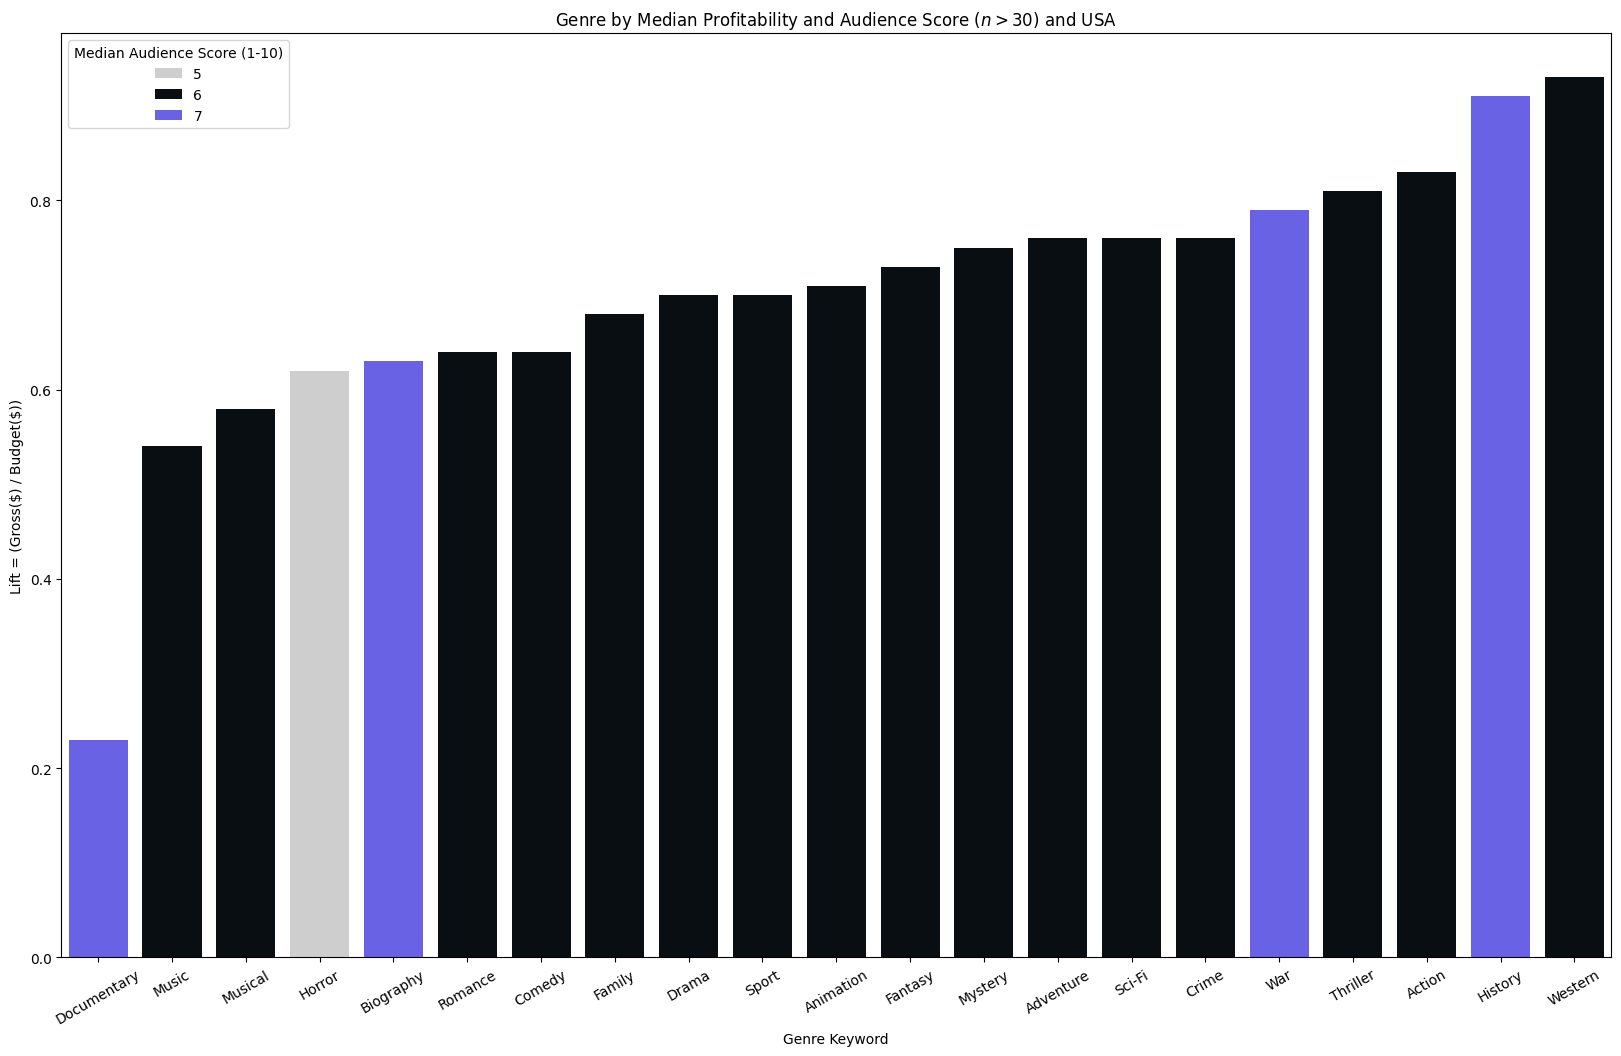

In [333]:
pal = {7: '#574cfa',
 6: '#070e15',
 5: '#cecece'}


fig, ax = plt.subplots()

sns.barplot(data = tbl, x = "genre_clean", y = "lift", hue = "median_score", palette=pal).set(title = "Genre by Median Profitability and Audience Score ($n > 30$) and USA",
                                                                                 xlabel= "Genre Keyword", ylabel = "Lift = (Gross(\$) / Budget(\$))")
plt.xticks(rotation=30)
ax.legend(title = "Median Audience Score (1-10)")

***

### Anova Analysis of all groups

check ANOVA, is there evidence of variance between the groups?

* $H_0$ : there is no difference in the groups in the population means
* $H_A$ : there is at least some difference between the groups 

* is the variation in group means greater than would be expected by chance? 




In [348]:

pg.anova(df_explode, dv = "lift", between="genre_clean", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,genre_clean,4.461757e+05,22,20280.713365,3.100824,0.000001,0.006049
1,Within,7.331165e+07,11209,6540.427386,NaN,NaN,NaN


***

* We would reject the Null Hypothesis that there is no difference between the groups

## By Country



In [334]:
df_explode = df.iloc[df["genres"].str.split("|").explode().index,:]
df_explode = df_explode.assign(genre_clean = df["genres"].str.split("|").explode())


tbl = df_explode.groupby(["country","genre_clean"]).agg(
    n = ("movie_title", "count"),
    median_score = ("movie_score", "median"),
    median_gross = ("gross", "median"),
    median_budget = ("budget", "median"),
    sum_gross = ("gross", "sum"),
    sum_budget = ("budget", "sum")
).query("(n > 30) and (country != 'USA')").astype(int)

tbl = tbl.assign(lift = (tbl["sum_budget"] / tbl["sum_gross"]).round(2)).sort_values(["country","lift", "median_score"], ascending = True)

tbl = tbl.reset_index()
tbl

,country,genre_clean,n,median_score,median_gross,median_budget,sum_gross,sum_budget,lift
0,Canada,Comedy,38,6,6479429,8000000,556328055,451745000,0.81
1,Canada,Thriller,39,6,4962768,8000000,799995911,751967000,0.94
2,Canada,Drama,62,6,4273232,8700000,406430730,664775000,1.64
3,France,Action,31,6,25296447,32000000,1158324048,1126300000,0.97
4,France,Thriller,55,6,15152879,24000000,1308821227,1448600000,1.11
5,France,Crime,38,6,3076425,25000000,474018032,945800000,2.00
6,France,Drama,96,6,3831129,17000000,843046590,2228014500,2.64
7,France,Romance,33,6,1877179,14500000,170551247,589304500,3.46
8,France,Comedy,41,6,1276984,17000000,169479797,1020400000,6.02
9,Germany,Comedy,32,5,23086299,26500000,1040914056,874200000,0.84


/Users/ryanhealy/Desktop/projects/interview/The-Zebra-Interview/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Genre by Median Profitability and Audience Score ($n > 30$) and not USA')

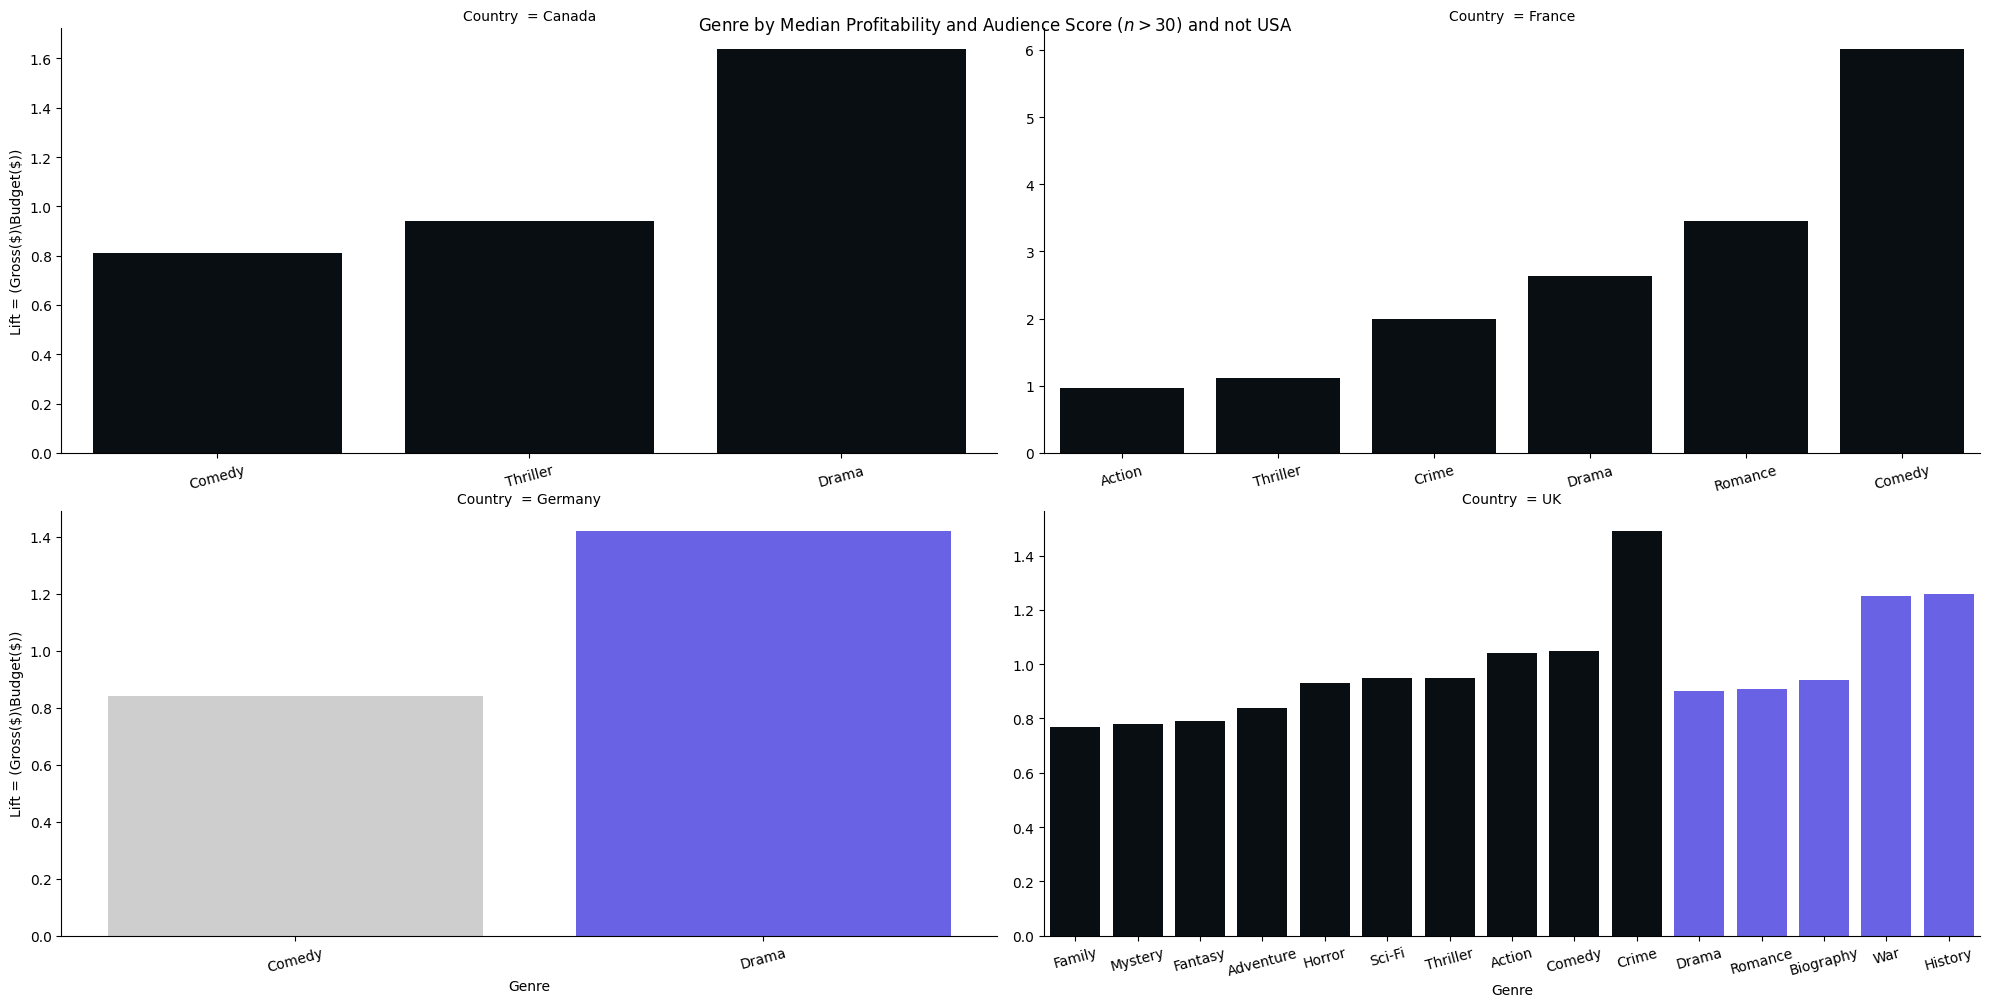

In [335]:


pal = {7: '#574cfa',
 6: '#070e15',
 5: '#cecece'}


g = sns.FacetGrid(data = tbl, col = 'country', 
                col_wrap=2, height=5, aspect=2,
                 hue='median_score', sharex=False, sharey=False
                 ,palette=pal)

g.map(sns.barplot,'genre_clean','lift')
g.set_titles('Country  = {col_name}')
g.set_axis_labels('Genre', 'Lift = (Gross(\$)\Budget(\$))')
g.set_xticklabels(rotation = 15)
g.fig.suptitle("Genre by Median Profitability and Audience Score ($n > 30$) and not USA")

## Combine Audience Score and Audience Reviews Recent

* do the genres change over time? view it in terms of median lift and recent decades

### Top 5 lift genres over time


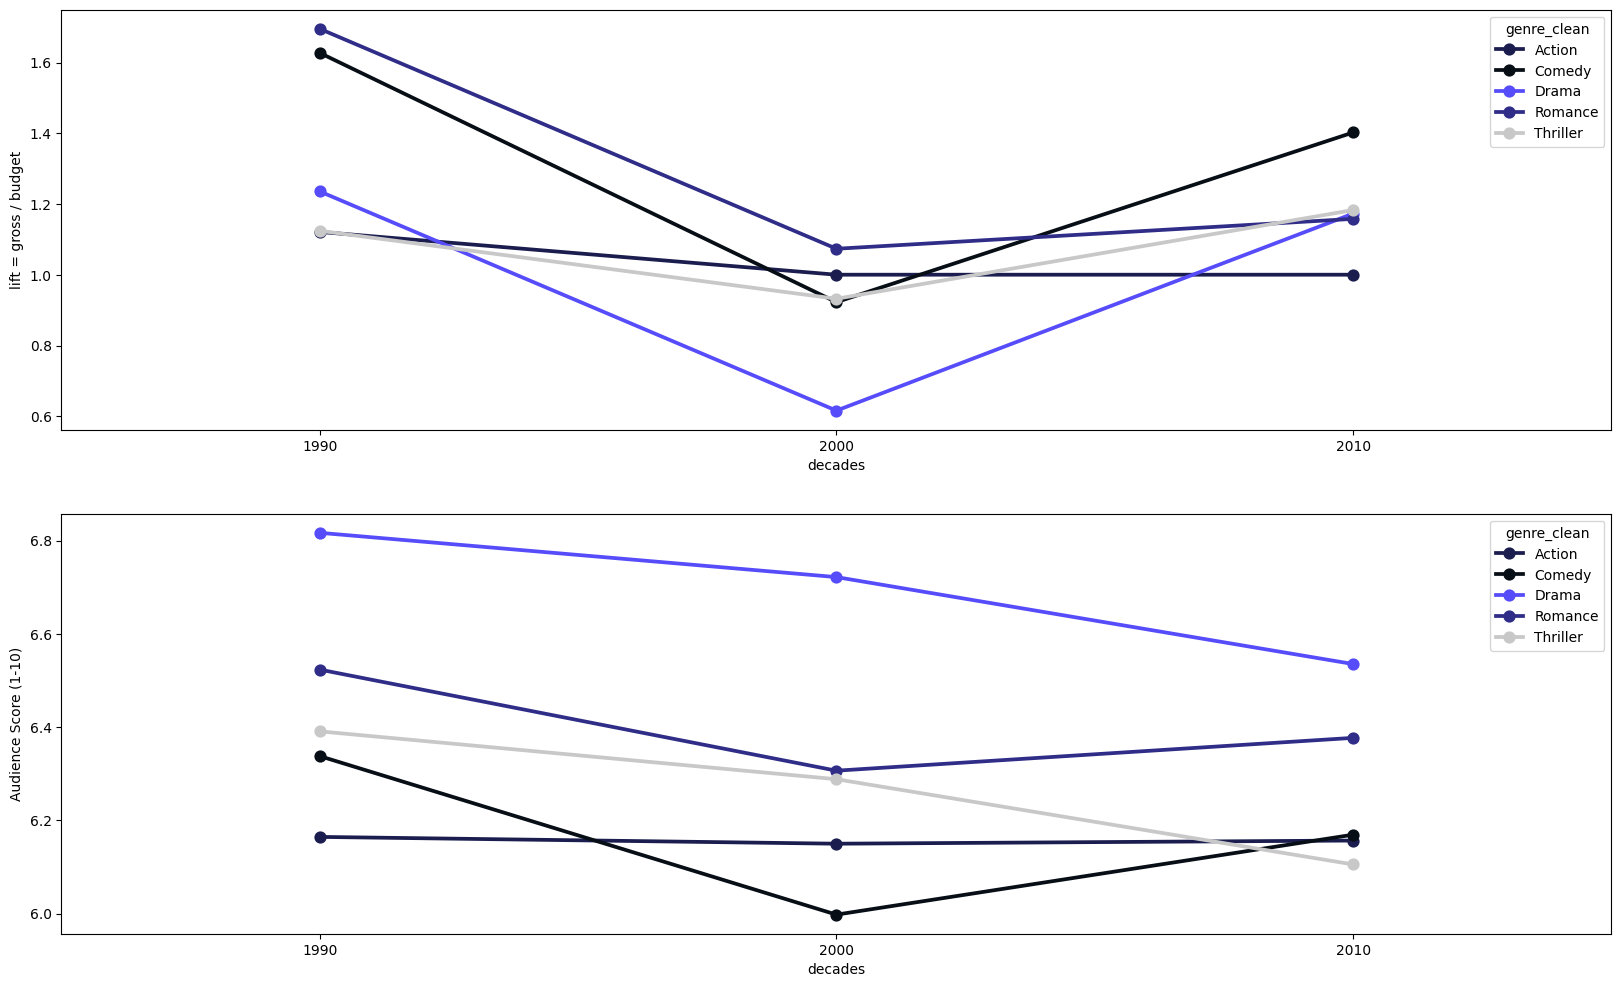

In [349]:
colors_zebra_interview = {
    "Vibrant Purple": "#574cfa",
    "Dark Charcoal": "#070e15",
     "Medium Gray": "#c8c8c8",
    "Deep Blue": "#1b1d4e",
    "Royal Blue": "#2f2d87",
    "Light Gray": "#c7c7c7",
    "Light Silver": "#cfcfcf",
    "Soft Gray": "#d0d0d0",
    "Warm Gray": "#cecece"
} # taken from attachments given in interview, used chatGPT to get hexidecimal 


df_explode = df.iloc[df["genres"].str.split("|").explode().index,:]
df_explode = df_explode.assign(genre_clean = df["genres"].str.split("|").explode())

# df_explode.loc[df_explode["decade"] < 1970, "decade"] = 1970
df_explode = df_explode.loc[df_explode["decade"] > 1980,]


tmp = df_explode.groupby("genre_clean").size().reset_index(name="count").sort_values("count")
enough_genre = tmp.sort_values("count", ascending=False).head(5)['genre_clean'].to_list()

df_explode = df_explode.loc[df_explode["genre_clean"].isin(enough_genre), ]

new_pal = {}

for k, v in zip(enough_genre, colors_zebra_interview.items()):
    new_pal[k] = v[1]


tbl = df_explode.groupby(["genre_clean", "decade"]).agg(
    n = ("movie_title", "count"),
    sum_gross = ("gross", "sum"),
    sum_budget = ("budget", "sum")
)

tbl["lift"] = tbl["sum_gross"] / tbl["sum_budget"]

tbl = tbl.reset_index()

lift_tbl = tbl.copy(deep=True)

# sns.pointplot(data = lift_tbl, x = "decade", y = "lift", hue="genre_clean", palette=new_pal).set(title = "Top 5 Genres by Lift, in the last 30 years", ylabel = "lift = gross / budget", xlabel = "decades")

df_explode = df.iloc[df["genres"].str.split("|").explode().index,:]
df_explode = df_explode.assign(genre_clean = df["genres"].str.split("|").explode())

# df_explode.loc[df_explode["decade"] < 1970, "decade"] = 1970
df_explode = df_explode.loc[df_explode["decade"] > 1980,]



tmp = df_explode.groupby("genre_clean").size().reset_index(name="count").sort_values("count")
enough_genre = tmp.sort_values("count", ascending=False).head(5)['genre_clean'].to_list()

df_explode = df_explode.loc[df_explode["genre_clean"].isin(enough_genre), ]

new_pal_2 = {}

for k, v in zip(enough_genre, colors_zebra_interview.items()):
    new_pal_2[k] = v[1]


tbl = df_explode.groupby(["genre_clean", "decade"]).agg(
    n = ("movie_title", "count"),
    sum_gross = ("gross", "sum"),
    sum_budget = ("budget", "sum"),
    sum_movie_score = ("movie_score", "sum")
)

tbl["movie_score"] = tbl["sum_movie_score"] / tbl["n"]

tbl = tbl.reset_index()
audience_tbl = tbl.copy(deep=True)

# sns.pointplot(data = audience_tbl, x = "decade", y = "movie_score", hue="genre_clean", palette=new_pal_2).set(title = "Top 5 Genres by Audience Score, in the last 30 years", 
#                                                                                                    ylabel = "Audience Score (1-10)", xlabel = "decades")


fig, ax = plt.subplots(2,1)

sns.pointplot(data = lift_tbl, x = "decade", y = "lift", hue="genre_clean", palette=new_pal, ax = ax[0]).set(ylabel = "lift = gross / budget", xlabel = "decades")
sns.pointplot(data = audience_tbl, x = "decade", y = "movie_score", hue="genre_clean", palette=new_pal_2, ax = ax[1]).set(ylabel = "Audience Score (1-10)", xlabel = "decades")

plt.show()

***

* Not sure if I like this graph, leaving it because it could be tuned and made into something